In [1]:
import numpy as np
import tensorflow as tf

# 이미지 입력 차수 -> 4차원
# 마지막 차수의 의미: 채널 수
# 장수, 행, 열, 채널
input_shape = (2, 2, 1, 3)  # 1은 차원만 늘리는 역할

# 2 x 2 x 1 x 3 요소수가 들어감.
x = np.arange(np.prod(input_shape)).reshape(input_shape)
print(x)

# 차원을 확대
y = tf.keras.layers.UpSampling2D(size = (2, 2))(x)

# 행, 열을 2배로 확대
print(y.shape)  # (2, 4, 2, 3)

[[[[ 0  1  2]]

  [[ 3  4  5]]]


 [[[ 6  7  8]]

  [[ 9 10 11]]]]
(2, 4, 2, 3)


# 실제 데이터 가지고 해보기

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [3]:
input_data = np.random.rand(1, 4, 4, 3).astype(np.float32)
print("Input Data Shape:", input_data.shape)
model = models.Sequential([
    # 나가는 차수 -> 5 / 차원 확대
    # Upsampling과 ConvTranspose의 차이점: 가중치 필요 여부 ( 단순한 것은 Upsampling )
    # 채널을 한 개로 보고, 3 x 3 필터를 5번 적용하라는 의미.
    layers.Conv2DTranspose(5, kernel_size = 3, strides = 2, activation = 'relu', padding = 'same', input_shape = (4, 4, 3)),
])

model.summary()

Input Data Shape: (1, 4, 4, 3)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv_transpose.py:94: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_transpose (Conv2DTranspose)   │ (None, 8, 8, 5)             │             140 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 140 (560.00 B)

 Trainable params: 140 (560.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import UpSampling2D, Flatten, Reshape
import matplotlib.pyplot as plt
import numpy as np

(X_train, _), (X_test, _) = mnist.load_data()  # 비지도 학습이라서 _로..
X_train = X_train.reshape(  # (60000, 28, 28, 1)
    X_train.shape[0], 28, 28, 1).astype('float32') / 255

X_test = X_test.reshape(  # 10,000장
    X_test.shape[0], 28, 28, 1).astype('float32') / 255

autoencoder = Sequential()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# 입력 차수 (28, 28,1) == 출력차수(28, 28,1)
# 입력 차수 (28, 28,1)와 재생성한 이미지(28, 28,1)가 같다

autoencoder.add(Conv2D(16, kernel_size=3, padding= 'same', input_shape=(28, 28, 1), activation='relu')) # 28x28x16으로 출력
autoencoder.add(MaxPooling2D(pool_size=2, padding='same')) # 14x14x16
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu',  padding='same')) # 14x14x8
autoencoder.add(MaxPooling2D(pool_size=2, padding='same')) # 7x7x8
# pooling할 때는 자투리를 제거하고 / stride할때는 자투리 고려하고

autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu')) # 4x4x8
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu')) # 4x4x8 --> latent vetor
                                                                             # 잠재벡터(생성 패턴 학습)

### ------------ 여기까지 인코더, 밑부터 디코더 역할

autoencoder.add(UpSampling2D()) # 8x8x8 채널은 불변

autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu')) # 8x8x8
autoencoder.add(UpSampling2D()) # 16x16x8

autoencoder.add(Conv2D(16, kernel_size=3, activation='relu')) # 14x14x16 --> same이 없어서 (16-3+1=14)
autoencoder.add(UpSampling2D()) # 28x28x16
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid')) # 28x28x1 --> 마지막 출력 = 입력차수
                                                                                # 원본차수와 동일(원본 이미지)
autoencoder.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 16, 16, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_3 (UpSampling2D)       │ (None, 28, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 1)           │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
X_train.shape

(60000, 28, 28, 1)

In [7]:
## MSE(Mean Square Error), BCE(Binary_CrossEntropy)
# 28x28x1 이미지  # 생성된 이미지 28x28x1
# BCE => 차이를 계산하는 손실 함수: softmax + sigmoid를 이용해 확률값으로 계산
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')

autoencoder.fit(X_train, X_train, epochs = 50, batch_size = 128, validation_data = (X_test, X_test))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - loss: 0.3162 - val_loss: 0.1332
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.1278 - val_loss: 0.1152
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.1141 - val_loss: 0.1078
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.1081 - val_loss: 0.1037
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1041 - val_loss: 0.1003
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1013 - val_loss: 0.0984
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0989 - val_loss: 0.0964
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0975 - val_loss: 0.0950
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0960 - val_loss: 0.0940
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0949 - val_loss: 0.0931
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0942 - val_loss: 0.0922
Epoch 12/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/s

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


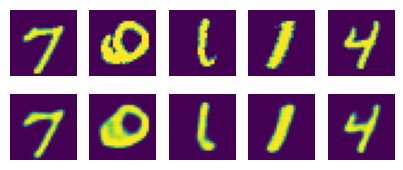

In [8]:
# 테스트 이미지 10,000 x 28 x 28 x 1

random_test = np.random.randint(X_test.shape[0], size = 5)  # 0 ~ 9999
# 가중치만 적용
ae_imgs = autoencoder.predict(X_test)  # 1,000 x 28x 28 x 1
plt.figure(figsize = (7, 2))

for i, image_idx in enumerate(random_test):
  ax = plt.subplot(2, 7, i + 1)
  # 원본 이미지
  plt.imshow(X_test[image_idx].reshape(28, 28))  # 이미지로 출력할 때는 2차원으로
  ax.axis('off')

  ax = plt.subplot(2, 7, 7+i+1)
  plt.imshow(ae_imgs[image_idx].reshape(28, 28))
  ax.axis('off')

plt.show()

In [9]:
import tensorflow as tf
x = tf.random.uniform((1, 28, 28, 1), minval = 0., maxval = 1.)
x_pred = tf.random.uniform((1, 28, 28, 1), minval = 0., maxval = 1.)

bce = tf.keras.losses.BinaryCrossentropy()
loss = bce(x, x_pred)
print("BCE Loss:", loss.numpy())

BCE Loss: 0.97966385


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
import tensorflow as tf

In [11]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print(x_train.shape)
print(x_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [12]:
latent_dim = 64

class Autoencoder(Model):
  def __init__(self, encoding_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    # AE는 encoder와 decoder로 구성
    self.encoder = tf.keras.Sequential([  # 잠재 벡터
        layers.Flatten(),  # 28x28x1  => 784
        layers.Dense(latent_dim, activation = 'relu'),  # 784 x 64
    ])

    self.decoder = tf.keras.Sequential([
        layers.Dense(784, activation='sigmoid'),  # 64 x 784
        layers.Reshape((28, 28))  # 이미지로 복원
    ])


  def call(self, x):  # 28 x 28 x 1
    encoded = self.encoder(x)  # 64 바이트. 잠재 벡터.
    decoded = self.decoder(encoded)  # 28 x 28 이미지가 나감.
    return decoded

autoencoder = Autoencoder(latent_dim)
# MSE는 '선형' / BCE는 '확률'
autoencoder.compile(optimizer = 'adam', loss = losses.MeanSquaredError())

In [13]:
autoencoder.fit(x_train, x_train,  # 동일 데이터
                epochs = 10,
                shuffle = True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0395 - val_loss: 0.0135
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0124 - val_loss: 0.0107
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0103 - val_loss: 0.0098
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0095 - val_loss: 0.0094
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0093 - val_loss: 0.0093
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0088 - val_loss: 0.0090


### 문제1: X_test의 차원 축소된 데이터를 출력하시오.
   - 원본 데이터를 시각화하고, 복원된 이미지를 시각화하시오.

In [14]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
encoded_imgs

array([[0.04264617, 2.0510244 , 1.7447379 , ..., 2.6579404 , 5.5306826 ,
        2.5549045 ],
       [3.3827896 , 0.14882684, 3.0130901 , ..., 5.0341816 , 1.4764646 ,
        4.3090158 ],
       [8.406326  , 3.136046  , 1.5108899 , ..., 4.7803745 , 6.633049  ,
        4.3498564 ],
       ...,
       [4.211974  , 2.9415884 , 1.5733072 , ..., 1.1628003 , 2.6570742 ,
        1.2400773 ],
       [3.1647334 , 3.0848222 , 1.7882607 , ..., 1.419739  , 6.2713695 ,
        2.4439557 ],
       [0.37122035, 2.3689404 , 1.752135  , ..., 0.596351  , 2.6939898 ,
        1.2318547 ]], dtype=float32)

In [15]:
encoded_imgs.shape  # (10000, 64)

(10000, 64)

In [16]:
# 모델에 입력, encoder에 입력, decoder에 입력
# 10000 x 28 x 28
# decoder에는 64로 입력이 되어야 함.

decoded_imgs = autoencoder.decoder(autoencoder.encoder(x_test)).numpy()
decoded_imgs.shape  # 10000x28x28

(10000, 28, 28)

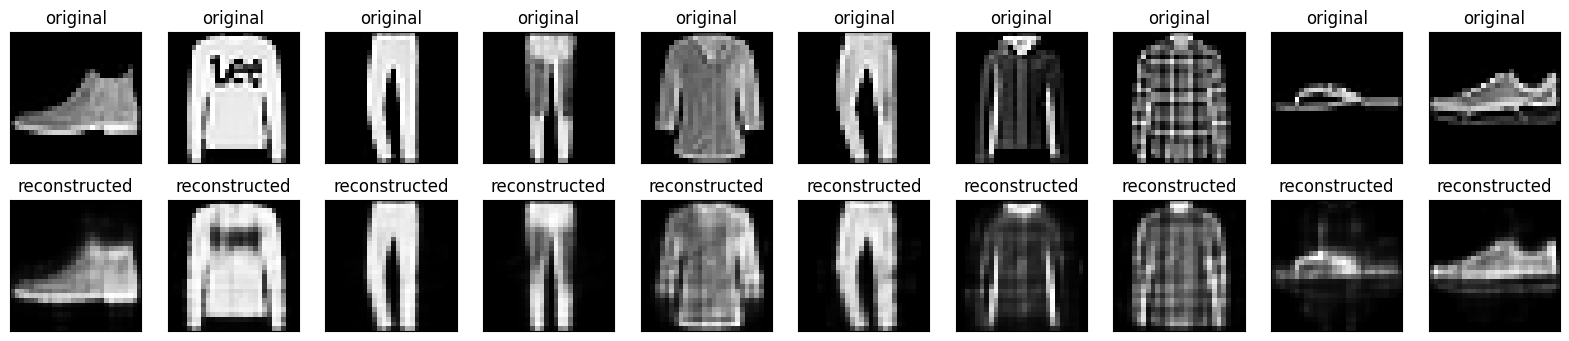

In [17]:
# PCA와 같으니까 Noise가 사라짐.
# CNN + FFNN 분류
# AE (PCA로 차원 축소: encoder에서 출력된 압출된 데이터 활용) + FFNN 분류
# 압축, 차원축소, 특징 추출
n = 10
plt.figure(figsize = (20, 4))

for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()

  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()

  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

###denoiseing

In [18]:
# Channel 고려하는 CNN 일 때
# 장 수, 가로, 세로, 채널
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)

(60000, 28, 28, 1)


# 노이즈 추가

In [19]:
# 부동소수점 이미지와 정수 이미지의 값 범위 (0~1), (0~255)
noise_factor = 0.2

# 60,000 x 28 x 28 x 1
x_train_noisy = x_train + noise_factor * tf.random.normal(shape = x_train.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape = x_test.shape)
x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)

x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min = 0., clip_value_max=1.)

In [20]:
x_test_noisy.shape

TensorShape([10000, 28, 28, 1])

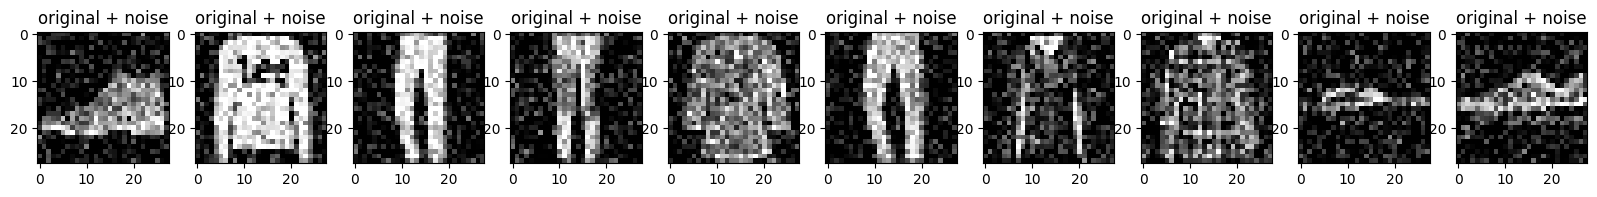

In [21]:
n = 10
plt.figure(figsize=(20, 2))

for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.title("original + noise")
  plt.imshow(tf.squeeze(x_test_noisy[i]))
  plt.gray()

plt.show()

In [22]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
        layers.Input(shape = (28, 28, 1)),
        ## 차원을 축소할 때 선택 방법 ( stride하고 pooling )
        # strides는 계산조차 안 함. pooling은 계산을 다 하고 선택한다는 차이점이 있음.
        # 그리고 stride가 계산량을 줄일 수 있음.  # 단순하고 일반화할 때는 => pooling
        # 14 x 14 x 16
        layers.Conv2D(16, (3, 3), activation = 'relu', padding = 'same', strides = 2),

        # 7 x 7 x 8  잠재 변수 (차원축소 -> FFNN을 달면)
        layers.Conv2D(8, (3, 3), activation = 'relu', padding = 'same', strides = 2)])

    # Upsampling2D 단순 차원 확대 vs Conv2DTranspose 차원을 확대하고, 가중치 적용 ( 정교하게 고려할 때 )
    self.decoder = tf.keras.Sequential([
        layers.Conv2DTranspose(8, kernel_size = 3, strides = 2, activation = 'relu', padding = 'same'),  # 14 x 14 x 8
        layers.Conv2DTranspose(16, kernel_size = 3, strides = 2, activation = 'relu', padding = 'same'),  # 28 x 28 x 16
        layers.Conv2D(1, kernel_size=(3, 3), activation = 'sigmoid', padding = 'same')])  # 28 x 28 x 1 => 원본 이미지

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


autoencoder = Denoise()
autoencoder.compile(optimizer = 'adam', loss = losses.MeanSquaredError())

In [23]:
autoencoder.fit(x_train_noisy, x_train, epochs=10, shuffle = True,
                validation_data = (x_test_noisy, x_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0370 - val_loss: 0.0104
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0099 - val_loss: 0.0091
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0088 - val_loss: 0.0084
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0083 - val_loss: 0.0081
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.0080 - val_loss: 0.0080
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0079 - val_loss: 0.0079
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0078 - val_loss: 0.0081
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0077 - val_loss: 0.0078
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0077 - val_loss: 0.0077
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0076 - val_loss: 0.0075


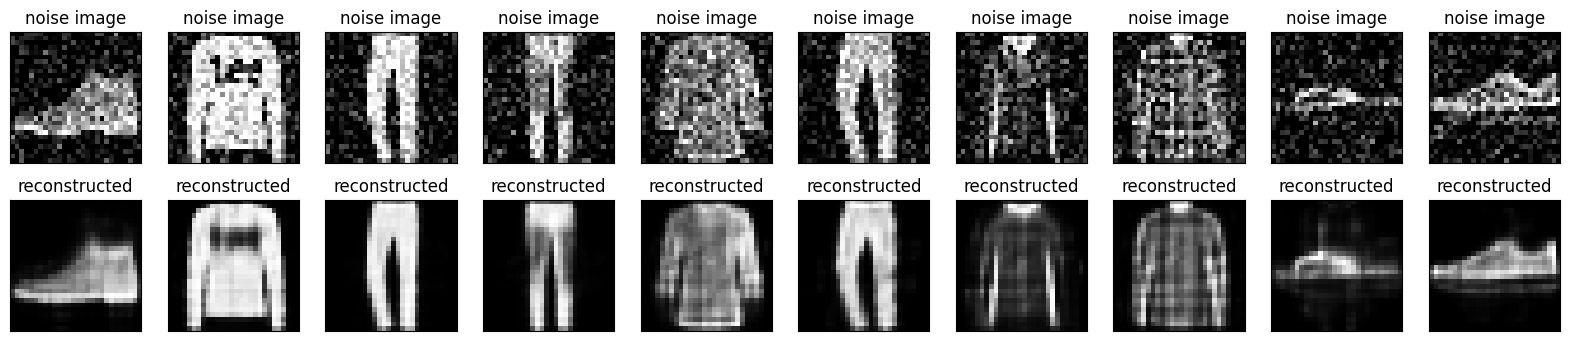

In [24]:
n = 10
plt.figure(figsize = (20, 4))

for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(tf.squeeze(x_test_noisy[i]))  # 1인 차원을 제거할 때
  plt.title("noise image")
  plt.gray()

  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(tf.squeeze(decoded_imgs[i]))
  plt.title("reconstructed")
  plt.gray()

  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

In [25]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder (x_test).numpy()

In [26]:
encoded_imgs.shape

(10000, 7, 7, 8)

# 분류기에 입력하는 형태로 만들어보시오.

In [27]:
7 * 7 * 8

# 10,000 x 392

392

In [28]:
encoded_features = encoded_imgs.reshape(10000, -1)
encoded_features.shape

# Dense망으로 FFNN을 구축하면 분류기가 됨.

(10000, 392)

# 이상 탐지 (Abnormal Detection)

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.reshape(x_train, (-1, 28, 28, 1))
x_test = np.reshape(x_test, (-1, 28, 28, 1))

In [30]:
# 이상 탐지: 통계학 -> IQR, 분산의 3배수 -> 정규분포
#            머신러닝 -> SVM -> One-class_SVM(정상으로만 학습), kmeans(거리) -> 원형이상치 탐지
#            딥러닝 -> AE, VAE, GAN -> 복원 기반 이상치 탐지

NORMAL_CLASS = 0   # 10개의 Class

x_train_normal = x_train[y_train == NORMAL_CLASS]
x_test_normal = x_test[y_test == NORMAL_CLASS]
x_test_anomaly = x_test[y_test != NORMAL_CLASS]

print(f"정상 샘플: {len(x_train_normal)}")
print(f"정상 테스트 샘플: {len(x_test_normal)}"), (f"이상 테스트 샘플: {len(x_test_anomaly)}")

정상 샘플: 6000
정상 테스트 샘플: 1000


(None, '이상 테스트 샘플: 9000')

In [31]:
def build_autoencoder():
  input_img = layers.Input(shape = (28, 28, 1))
  # 28x28x32
  x = layers.Conv2D(32, 3, activation = 'relu', padding = 'same')(input_img)
  # 14x14x32
  x = layers.MaxPooling2D(2, padding = 'same')(x)
  # 14x14x16
  x = layers.Conv2D(16, 3, activation = 'relu', padding = 'same')(x)
  # 7x7x16

  encoded = layers.MaxPooling2D(2, padding = 'same')(x)
  # 7x7x16
  x = layers.Conv2D(16, 3, activation='relu', padding='same')(encoded)
  # 14x14x16
  x = layers.UpSampling2D(2)(x)
  # 14x14x32
  x = layers.Conv2D(32, 3, activation = 'relu', padding = 'same')(x)
  # 28x28x32
  x = layers.UpSampling2D(2)(x)
  # 28x28x1
  decoded = layers.Conv2D(1, 3, activation = 'sigmoid', padding = 'same')(x)
  autoencoder = models.Model(input_img, decoded)
  autoencoder.compile(optimizer='adam', loss='mse')
  return autoencoder

autoencoder = build_autoencoder()
autoencoder.summary()

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 14, 14, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 7, 7, 16)            │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_4 (UpSampling2D)       │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 14, 14, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_5 (UpSampling2D)       │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,193 (47.63 KB)

 Trainable params: 12,193 (47.63 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
story = autoencoder.fit(x_train_normal, x_train_normal,
                        epochs = 10,
                        batch_size = 128,
                        shuffle = True,
                        validation_data = (x_test_normal, x_test_normal))

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 0.1216 - val_loss: 0.0238
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0220 - val_loss: 0.0165
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0159 - val_loss: 0.0141
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - val_loss: 0.0130
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - val_loss: 0.0120
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - val_loss: 0.0113
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - val_loss: 0.0108
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - val_loss: 0.0105
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - val_loss: 0.0100
Epoch 10/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - val_loss: 0.0097


# 재구성 오류함수

In [40]:
def compute_reconstruction_errors(model, data):
  reconstructed = model.predict(data)  # 28x28x1
  # 차이값 계산 (장 수, 행, 열, 채널)
  errors = np.mean(np.square(data - reconstructed), axis = (1, 2, 3))

  return errors, reconstructed

# 이상탐지 기준 설정

In [41]:
# 차이값 리턴
normal_errors, _ = compute_reconstruction_errors(autoencoder, x_test_normal)

# 95%까지는 정상이고, 나머지는 이상치로 본다.
threshold = np.percentile(normal_errors, 95)  # 데이터를 보고 결정

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [42]:
# 오토인코더 학습 끝난 상태에서:
def compute_reconstruction_errors(data):
    reconstructed = autoencoder.predict(data)
    errors = np.mean(np.square(data - reconstructed), axis=(1, 2, 3))
    return errors, reconstructed

# 에러 계산 및 threshold 설정
normal_errors, _ = compute_reconstruction_errors(autoencoder, x_test_normal)
threshold = np.percentile(normal_errors, 95)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


# 테스트 데이터에서 이상 탐지

In [46]:
anomaly_errors, anomaly_recon = compute_reconstruction_errors(autoencoder, x_test_anomaly)
anomaly_detected = anomaly_errors > threshold  # 95% 이상인 것
anomaly_rate = np.mean(anomaly_detected)

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


# 이상탐지 결과 출력

In [47]:
print(f"\n이상탐지 경계값: {threshold:.4f}")
print(f"이상값 {np.sum(anomaly_detected)} 전체 데이터: {len(anomaly_detected)} ({anomaly_rate * 100: .2f}%)")


이상탐지 경계값: 0.0219
이상값 1385 전체 데이터: 9000 ( 15.39%)


# GAN (Generative - Adversarial Network)
   - 패턴과 분포를 학습
   - 손실함수: KL-Digvergance(발산)

In [48]:
P = np.array([0.3, 0.4, 0.3])
Q = np.array([0.2, 0.3, 0.5])

kl_divergence = np.sum(P * np.log(P / Q))
print("KL Divergence:", kl_divergence)

KL Divergence: 0.08346467428336446


In [49]:
P = np.array([0.3, 0.4, 0.3])
Q = np.array([0.09, 0.99, 0.89])

kl_divergence = np.sum(P * np.log(P / Q))
print("KL Divergence:", kl_divergence)

KL Divergence: -0.32753601353147593


In [50]:
import os
os.makedirs('./gan_images', exist_ok = True)

In [51]:
import os
if not os.path.exists("./gan_images"):
  os.makedirs("./gan_images")

np.random.seed(3)
tf.random.set_seed(3)

In [52]:
from tensorflow.keras.layers import Reshape, Flatten, Dropout, LeakyReLU
from tensorflow.keras.layers import BatchNormalization, Activation, UpSampling2D
from tensorflow.keras.models import Sequential, Model

# 생성기

In [53]:
generator = Sequential()
generator.add(Dense(128 * 7 * 7, input_dim = 100, activation = LeakyReLU(0.2)))  # 100 -> 노이즈가 100개 입력
# LeakyReLU -> -1 까지만 고려
generator.add(BatchNormalization())  # 데이터를 정규분포로 이동
generator.add(Reshape((7, 7, 128)))  # 채널이 128 (7x7 채널이 128개 있다)
generator.add(UpSampling2D())  # 14x14x128
generator.add(Conv2D(64, kernel_size = 5, padding = 'same'))  # 14x14x64
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D())  # 28x28x64
# 28x28x1 -> 이미지를 생성
generator.add(Conv2D(1, kernel_size = 5, padding = 'same', activation='tanh'))
generator.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 6272)                │         633,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 6272)                │          25,088 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_6 (UpSampling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 14, 14, 64)          │         204,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_7 (UpSampling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 28, 28, 1)           │           1,601 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 865,281 (3.30 MB)

 Trainable params: 852,609 (3.25 MB)

 Non-trainable params: 12,672 (49.50 KB)

In [54]:
# 원본 이미지, 가짜 이미지에 대해서
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size = 5, strides = 2, input_shape = (28, 28, 1), padding = 'same'))  # 14x14x64
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
# 7x7x128
discriminator.add(Conv2D(128, kernel_size = 5, strides = 2, padding = 'same'))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())  # 6272
discriminator.add(Dense(1, activation='sigmoid'))  # 1개 나감. ( 1 분포차를 계산)
discriminator.compile(loss = 'binary_crossentropy', optimizer = 'adam')  # 모델 만들어짐: 판별기는 학습이 됨.
discriminator.trainable = False  # 학습하지 않음.
discriminator.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)                   │ (None, 14, 14, 64)          │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 7, 7, 128)           │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │           6,273 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 212,865 (831.50 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 212,865 (831.50 KB)

# 두 모델 합치기

In [55]:
ginput = Input(shape = (100, ))  # 입력이 noise가 됨.
# 학습이 됨.
dis_output = discriminator(generator(ginput))  # 가짜이미지를 생성하고, 판별기에 입력
gan = Model(ginput, dis_output)  # 여기서의 판별기는 학습하지 않음.
gan.compile(loss = 'binary_crossentropy', optimizer = 'adam')
gan.summary()

Model: "functional_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_6 (Sequential)            │ (None, 28, 28, 1)           │         865,281 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_7 (Sequential)            │ (None, 1)                   │         212,865 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,078,146 (4.11 MB)

 Trainable params: 852,609 (3.25 MB)

 Non-trainable params: 225,537 (881.00 KB)

In [56]:
# 학습된 generator를 이용해서, 이미지를 생성해 저장하는 간격
def gan_train(epoch, batch_size, saving_interval):
  (X_train, _), (_, _) = mnist.load_data()
  # 생성 이미지 28x28x1, 입력된 이미지도 28x28x1
  X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
  # 데이터 범위 ( 0 ~ 255 ) 이미지 컬러 ( -127.5 ~ 127.5 )
  X_train = (X_train - 127.5) / 127.5  # -1 에서 1 사이 값
  true = np.ones((batch_size, 1))  # 전부 1인 사이즈 -> 32 (진짜 데이터면 다 맞고)
  fake = np.zeros((batch_size, 1))  # 전부 0인 사이즈 -> 32 (가짜 데이터면 다 틀리게)

  for i in range(epoch):
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    imgs = X_train[idx]  # 실제 이미지 32장 선택
    ## 판별기를 학습
    d_loss_real = discriminator.train_on_batch(imgs, true) # 배치 사이즈만큼의 숫자가 나옴.
    # 32(batch size가 32장) x 100 노이즈가 생성됨.
    noise = np.random.normal(0, 1, (batch_size, 100))
    gen_imgs = generator.predict(noise)  # 32장의 이미지, 28x28x1이 만들어짐. ( 32x28x28x1 )
    d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)  # 판별기를 0으로 속이고, 학습시킴.
    # 두 개의 로스가 반반씩 영향을 미침.
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    g_loss = gan.train_on_batch(noise, true)
    print('epoch:%d' % i, 'd_loss:%.4f' % d_loss, 'g_loss:%.4f' % g_loss)

    if i % saving_interval == 0:
      noise = np.random.normal(0, 1, (25, 100))  # 25장의 이미지를 만들기 위한 noise 100
      gen_imgs = generator.predict(noise)  # 가짜 이미지를 생성
      ## 생성된 이미지를 원래 사이즈로 ( 0 ~ 1 사이의 값으로 )
      gen_imgs = 0.5 * gen_imgs + 0.5  # 부동소수점 이미지인 0 ~ 1사이의 이미지로
      fig, axs = plt.subplots(5, 5)
      count = 0

      for j in range(5):
        for k in range(5):
          axs[j, k].imshow(gen_imgs[count, :, :, 0], cmap = 'gray')
          axs[j, k].axis('off')
          count += 1

      fig.savefig("gan_images/gan_mnist_%d.png" % i)

In [57]:
gan_train(4001, 32, 200)

Output hidden; open in https://colab.research.google.com to view.

In [58]:
X_train.shape

(60000, 28, 28, 1)

In [59]:
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

In [ ]:
display_image(EPOCHS)